In [131]:

!pip install python-whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse,urlencode
import ipaddress
import re
import re
import urllib
import urllib.request
from datetime import datetime
import requests

In [133]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [134]:
phishing_dataset = pd.read_csv("/content/drive/MyDrive/online-valid.csv")
phishing_dataset.head()


,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,8018078,https://ipchiro.com/assets/sella/,http://www.phishtank.com/phish_detail.php?phis...,2023-01-27T06:57:11+00:00,yes,2023-01-27T07:04:29+00:00,yes,Other
1,8018074,http://area-clienti.bambinos.it/st,http://www.phishtank.com/phish_detail.php?phis...,2023-01-27T06:53:06+00:00,yes,2023-01-27T07:04:29+00:00,yes,Other
2,8018075,https://ipchiro.com/assets/managehosting/,http://www.phishtank.com/phish_detail.php?phis...,2023-01-27T06:53:06+00:00,yes,2023-01-27T07:04:30+00:00,yes,Other
3,8018073,http://area-clienti.bambinos.it/st/,http://www.phishtank.com/phish_detail.php?phis...,2023-01-27T06:53:04+00:00,yes,2023-01-27T07:04:30+00:00,yes,Other
4,8018069,https://aibudgets.com/meta/,http://www.phishtank.com/phish_detail.php?phis...,2023-01-27T06:29:31+00:00,yes,2023-01-27T06:33:10+00:00,yes,Other


In [135]:
phishing_dataset.shape

(14296, 8)

In [136]:
legitimate_dataset = pd.read_csv("/content/drive/MyDrive/legitimate_urls.csv")
legitimate_dataset.columns = ['URLs']
legitimate_dataset.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [137]:
legitimate_dataset.shape

(35377, 1)

In [138]:
phishing_dataset = phishing_dataset.sample(n = 10000, random_state = 12).copy()
phishing_dataset = phishing_dataset.reset_index(drop=True)
phishing_dataset.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7611559,https://docdrive01060authorizesharingfile.onmi...,http://www.phishtank.com/phish_detail.php?phis...,2022-07-21T21:49:59+00:00,yes,2022-07-21T22:10:42+00:00,yes,Other
1,8005754,http://194.62.166.177/verify,http://www.phishtank.com/phish_detail.php?phis...,2023-01-14T01:44:30+00:00,yes,2023-01-14T01:52:06+00:00,yes,Facebook
2,8008011,https://www.scaleadomenico.it/63b7e6f378ff19de...,http://www.phishtank.com/phish_detail.php?phis...,2023-01-17T10:24:11+00:00,yes,2023-01-17T10:32:20+00:00,yes,Other
3,7972580,https://cloudcam.org.in/assets/,http://www.phishtank.com/phish_detail.php?phis...,2022-12-10T06:08:32+00:00,yes,2022-12-12T02:32:53+00:00,yes,Other
4,8012673,https://30westmediagroup.improled.com.ec/#reda...,http://www.phishtank.com/phish_detail.php?phis...,2023-01-21T16:16:17+00:00,yes,2023-01-21T16:22:04+00:00,yes,Other


In [139]:
legitimate_dataset = legitimate_dataset.sample(n = 10000, random_state = 12).copy()
legitimate_dataset = legitimate_dataset.reset_index(drop=True)
legitimate_dataset.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [140]:
legitimate_dataset.shape

(10000, 1)

**Feature extraction**

**domain extraction**

In [141]:
def extract_domain(url):  
  extracted_domains = urlparse(url).netloc
  if re.match(r"^www.",extracted_domains):
    extracted_domains = extracted_domains.replace("www.","")
    return extracted_domains


**IP Address**

In [142]:
def url_IP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

**URL length**

In [143]:
def url_length(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [144]:
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [145]:
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

**checking redirection in URL**

In [146]:
def url_redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

https check

In [147]:
def https_check(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

URL actual length

In [148]:
websites_to_shorten_url_length = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [149]:
def short_urls(url):
    match=re.search(websites_to_shorten_url_length,url)
    if match:
        return 1
    else:
        return 0

checking prefix 

In [150]:
def checking_prefix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [151]:
import requests

In [152]:
def get_features(url,label):

  extracted_features = []
  extracted_features.append(extract_domain(url))
  extracted_features.append(url_IP(url))
  extracted_features.append(url_length(url))
  extracted_features.append(url_redirection(url))
  extracted_features.append(https_check(url))
  extracted_features.append(short_urls(url))
  extracted_features.append(checking_prefix(url))
  extracted_features.append(getDepth(url))
  extracted_features.append(label)
  extracted_features.append(haveAtSign(url))
  
  
  
 
  
 
 
  
  return extracted_features

**legitimate websites features**

In [153]:
legitimate_features = []
label = 0

for i in range(0, 10000):
  url = legitimate_dataset['URLs'][i]
  legitimate_features.append(get_features(url,label))

In [154]:
feature_names = ['Domain', 'Have_IP', 'URL_Length','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix','url depth', 'Label',"at sign"]

legitimate_features_extracted = pd.DataFrame(legitimate_features, columns= feature_names)
legitimate_features_extracted.head()

,Domain,Have_IP,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,url depth,Label,at sign
0,None,0,1,0,0,0,0,1,0,0
1,None,0,1,1,0,0,0,1,0,0
2,None,0,1,0,0,0,0,1,0,0
3,None,0,1,0,0,0,0,3,0,0
4,None,0,1,0,0,0,0,3,0,0


In [155]:
legitimate_features_extracted.to_csv('legitimate_features_extracted.csv', index= False)

In [156]:
phishing_features = []
label = 1
for i in range(0, 10000):
  url = phishing_dataset['url'][i]
  phishing_features.append(get_features(url,label))

In [157]:
feature_names = ['Domain', 'Have_IP', 'URL_Length','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix',"url depth", 'Label',"at sign"]

phishing_features_extracted = pd.DataFrame(phishing_features, columns= feature_names)
phishing_features_extracted.head()

,Domain,Have_IP,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,url depth,Label,at sign
0,None,0,1,0,0,0,0,0,1,0
1,None,0,0,0,0,0,0,1,1,0
2,scaleadomenico.it,0,1,0,0,0,0,2,1,0
3,None,0,0,0,0,0,0,1,1,0
4,None,0,1,0,0,0,0,0,1,1


In [158]:
phishing_features_extracted.to_csv('phishing_features_extracted.csv', index=False)

In [159]:
combined_datastore = pd.concat([legitimate_features_extracted, phishing_features_extracted]).reset_index(drop=True)
combined_datastore.head()

,Domain,Have_IP,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,url depth,Label,at sign
0,None,0,1,0,0,0,0,1,0,0
1,None,0,1,1,0,0,0,1,0,0
2,None,0,1,0,0,0,0,1,0,0
3,None,0,1,0,0,0,0,3,0,0
4,None,0,1,0,0,0,0,3,0,0


In [160]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [161]:
combined_datastore.to_csv('combined_datastore.csv', index=False)

In [162]:
Data_store = combined_datastore
Data_store.head()

,Domain,Have_IP,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,url depth,Label,at sign
0,None,0,1,0,0,0,0,1,0,0
1,None,0,1,1,0,0,0,1,0,0
2,None,0,1,0,0,0,0,1,0,0
3,None,0,1,0,0,0,0,3,0,0
4,None,0,1,0,0,0,0,3,0,0


In [163]:
Data_store.columns

Index(['Domain', 'Have_IP', 'URL_Length', 'Redirection', 'https_Domain',
       'TinyURL', 'Prefix/Suffix', 'url depth', 'Label', 'at sign'],
      dtype='object')

In [164]:
Data_store.shape

(20000, 10)

In [165]:

Data_store.describe()

,Have_IP,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,url depth,Label,at sign
count,20000.0,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,0.0,0.629450,0.009950,0.000050,0.070500,0.178600,2.091600,0.500000,0.01565
std,0.0,0.482964,0.099255,0.007071,0.255994,0.383027,2.087038,0.500013,0.12412
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.500000,0.00000
75%,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.00000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.00000


In [166]:
Data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         696 non-null    object
 1   Have_IP        20000 non-null  int64 
 2   URL_Length     20000 non-null  int64 
 3   Redirection    20000 non-null  int64 
 4   https_Domain   20000 non-null  int64 
 5   TinyURL        20000 non-null  int64 
 6   Prefix/Suffix  20000 non-null  int64 
 7   url depth      20000 non-null  int64 
 8   Label          20000 non-null  int64 
 9   at sign        20000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 1.5+ MB


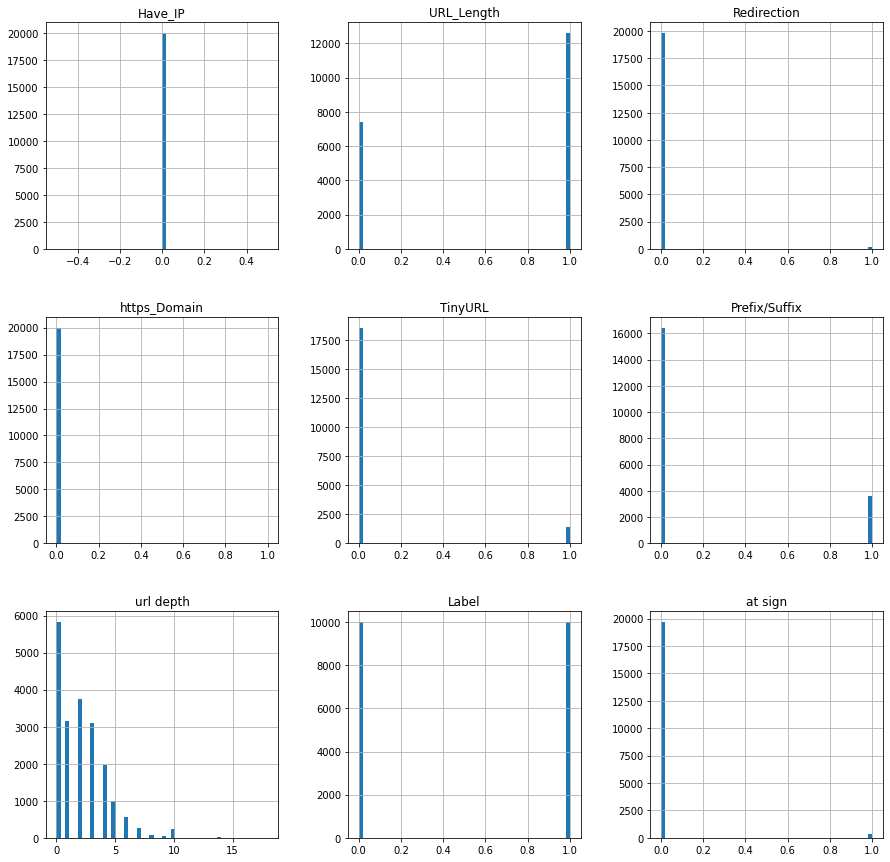

In [167]:
Data_store.hist(bins = 50,figsize = (15,15))
plt.show()

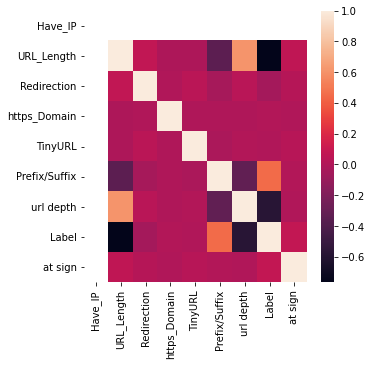

In [168]:
plt.figure(figsize=(5,5))
sns.heatmap(Data_store.corr())
plt.show()

In [169]:
Data_store=pd.read_csv("/content/drive/MyDrive/final_features.csv")

In [170]:
Data_store.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [171]:
Data_store = Data_store.sample(frac=1).reset_index(drop=True)
Data_store.head()
     

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Target
0,5037,1,-1,1,1,1,-1,1,1,-1,...,1,1,1,1,1,-1,-1,-1,-1,1
1,10404,-1,-1,1,1,1,-1,1,1,-1,...,-1,1,1,1,1,-1,1,0,1,1
2,9275,-1,-1,1,1,1,-1,-1,-1,-1,...,1,1,1,1,1,-1,-1,1,1,0
3,7547,1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,1,1,1,1,0,1,0
4,3791,1,1,1,1,1,-1,0,-1,-1,...,1,1,-1,-1,-1,-1,1,1,1,0


In [172]:
y = Data_store['Target']
X = Data_store.drop('Target',axis=1)

X.shape, y.shape

((11055, 31), (11055,))

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1, random_state = 12)
X_train.shape, X_test.shape
     

((9949, 31), (1106, 31))

In [174]:
Data_store.Target.unique()

array([1, 0])

In [176]:
Data_store.Target.value_counts()

1    6157
0    4898
Name: Target, dtype: int64

In [177]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [178]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [179]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [180]:
X_train.shape

(9949, 31)

In [181]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [182]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [183]:
from tensorflow import keras
from tensorflow.keras import layers

In [184]:
model=Sequential()
model.add(Conv1D(128,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(256,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

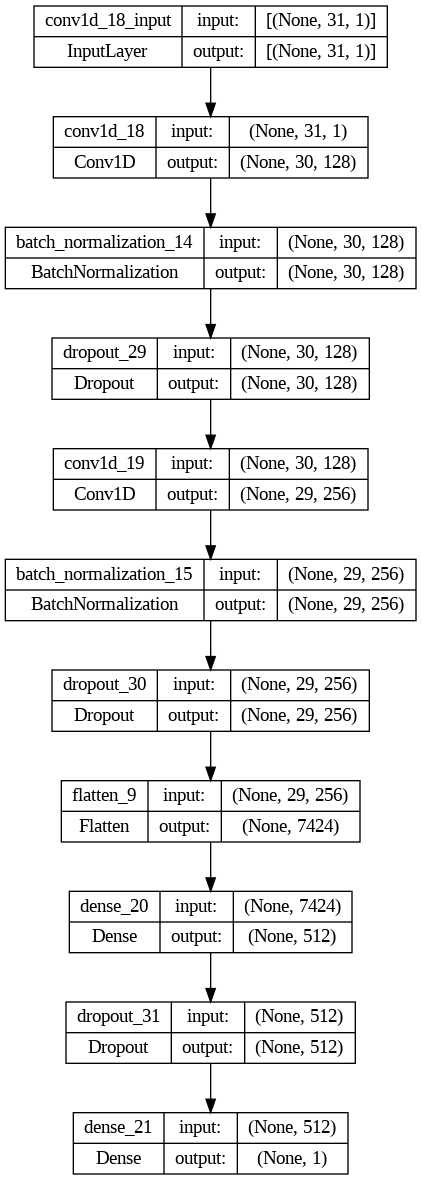

In [186]:
from keras.utils import plot_model

model = Sequential()
model.add(Conv1D(128,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(256,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

plot_model(model, to_file='model.png', show_shapes=True)

In [187]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 30, 128)           384       
                                                                 
 batch_normalization_14 (Bat  (None, 30, 128)          512       
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 30, 128)           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 29, 256)           65792     
                                                                 
 batch_normalization_15 (Bat  (None, 29, 256)          1024      
 chNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 29, 256)         

In [188]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
    
)

In [223]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=70
)

Epoch 1/70
20/20 [==============================] - 11s 503ms/step - loss: 0.0299 - binary_accuracy: 0.9859 - val_loss: 0.0517 - val_binary_accuracy: 0.9801
Epoch 2/70
20/20 [==============================] - 9s 447ms/step - loss: 0.0313 - binary_accuracy: 0.9858 - val_loss: 0.0515 - val_binary_accuracy: 0.9810
Epoch 3/70
20/20 [==============================] - 9s 452ms/step - loss: 0.0273 - binary_accuracy: 0.9867 - val_loss: 0.0522 - val_binary_accuracy: 0.9801
Epoch 4/70
20/20 [==============================] - 9s 453ms/step - loss: 0.0307 - binary_accuracy: 0.9867 - val_loss: 0.0531 - val_binary_accuracy: 0.9783
Epoch 5/70
20/20 [==============================] - 9s 451ms/step - loss: 0.0272 - binary_accuracy: 0.9876 - val_loss: 0.0534 - val_binary_accuracy: 0.9801
Epoch 6/70
20/20 [==============================] - 9s 451ms/step - loss: 0.0311 - binary_accuracy: 0.9847 - val_loss: 0.0527 - val_binary_accuracy: 0.9810
Epoch 7/70
20/20 [==============================] - 9s 452ms/st

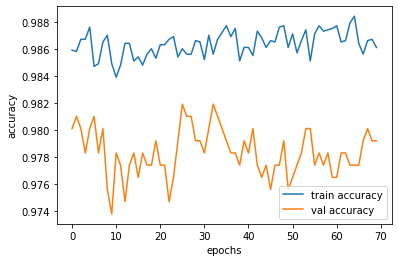

In [224]:
epochs = list(range(70))
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

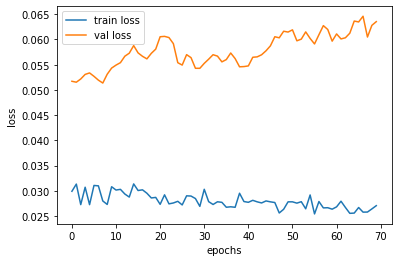

In [225]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [226]:
ypred=model.predict(X_test)

35/35 [==============================] - 0s 11ms/step


In [227]:
ypred = (ypred>0.5)

In [228]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

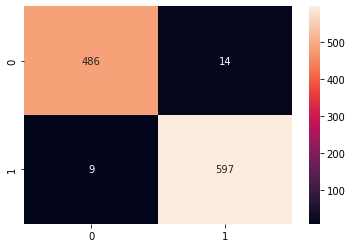

In [229]:
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt="d")

In [230]:
accuracy_score(y_test, ypred)

0.9792043399638336

In [231]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

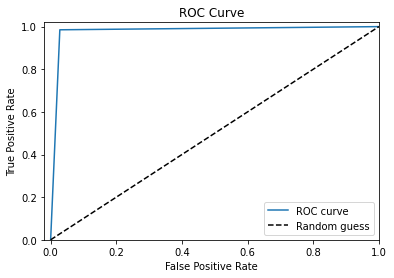

In [232]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [233]:
macro_averaged_precision = metrics.precision_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.9794524624311858


In [218]:
micro_averaged_precision = metrics.precision_score(y_test, ypred, average = 'micro')
print(f"Micro-Averaged Precision score using sklearn library : {micro_averaged_precision}")

Micro-Averaged Precision score using sklearn library : 0.9801084990958409


In [219]:
macro_averaged_recall = metrics.recall_score(y_test, ypred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.9797491749174918


In [220]:
micro_averaged_recall = metrics.recall_score(y_test, ypred, average = 'micro')
print(f"Micro-Averaged recall score using sklearn library : {micro_averaged_recall}")

Micro-Averaged recall score using sklearn library : 0.9801084990958409


In [221]:
macro_averaged_f1 = metrics.f1_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.9799170003928779


In [222]:
micro_averaged_f1 = metrics.f1_score(y_test, ypred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

Micro-Averaged F1 score using sklearn library : 0.9801084990958409
